<div align="center">
<h1>EDA on the World Happiness report for 2020<h1>
<div>

We are going to need the following libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's import the datasets that from https://worldhappiness.report/ed/2021/#appendices-and-data 

In [2]:
path = './data/MortalityDataWHR2021C2.xlsx'
mortality_data = pd.read_excel(path)

In [3]:
path2 = './data/DataForFigure2.1WHR2021C2.xls'
data_2020 = pd.read_excel(path2)

In [4]:
path3 = './data/DataPanelWHR2021C2.xls'
historical_data = pd.read_excel(path3)

## Functions:  
I'm going to create some functions for the data cleaning, data analysis and plotting.

In [5]:
def dropping_rows_NaN(dataframe, column):
    """
    removes the rows of the dataframe where there is some missings values in the column of your choice.
    
    arguments:
    - dataframe: the name of the dataframe,
    - column: the name of the column of the dataframe we want to check for missing values.
    
    It will return the dataframe cleaned of the rows with missing values in the choosen column.
    """
    
    
    index_list = list(dataframe[dataframe[column].isnull()].index)
    
    dataframe = dataframe.drop(index_list)
    
    return dataframe

In [6]:
def percentage_missing(dataframe):
    """
    calculates the percentage of missings for each columns of the dataframe.
    
    argument: 
    - dataframe: the name of the dataframe.
    
    It return a dataframe with the percentage of missings for each columns.
    """
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'percentage missing': percent_missing,}).sort_values('percentage missing', ascending=False)
    
    return missing_value_df

In [7]:
def plot_variables(col):
    """
    creates a plot of the highest and lowest 10 countries for a column of the dataframe data_2020.
    
    arguments:
    - col: it has to be one of the following column of the dataframe data_2020: Ladder score, Logged GDP per capita, Social support, Healthy life expectancy, 
    Freedom to make life choices or Generosity.
    
    It will return 2 subplots with the highest 10 countries on the left and the lowest 10 on the right.
    """
        
    if col == 'Perceptions of corruption':
        top10 = data_2020[['Country name', col]].sort_values(by=col, ascending=True).head(10)
        last10 = data_2020[['Country name', col]].sort_values(by=col, ascending=True).tail(10)
            
        fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True)
        ax1= sns.barplot(data=top10, y='Country name', x= col, palette= 'YlGn_r', ax=ax[0])
        ax2= sns.barplot(data=last10, y='Country name', x= col, palette= 'YlOrRd', ax=ax[1])
            
        ax1.set_title('Top 10 {}'.format(col))
        ax2.set_title('Last 10 {}'.format(col))
            
        fig.tight_layout()
        plt.show();
            
    else:
        top10 = data_2020[['Country name',col]].sort_values(by=col, ascending=False).head(10)
        last10 = data_2020[['Country name',col]].sort_values(by=col, ascending=False).tail(10)
            
        fig, ax = plt.subplots(1,2, figsize=(15,5), sharex=True)
        ax1= sns.barplot(data=top10, y='Country name', x= col, palette= 'YlGn_r', ax=ax[0])
        ax2= sns.barplot(data=last10, y='Country name', x= col, palette= 'YlOrRd', ax=ax[1])
            
        ax1.set_title('Top 10 {}'.format(col))
        ax2.set_title('Last 10 {}'.format(col))
            
        fig.tight_layout()
        plt.show();
            

In [8]:
def country_rankings(country, year):
    """
    shows the different rankings (Ladder score, GDP, social support, life expectancy, freedom to make life coices and generosity) of a country for a specific year.
    
    Arguments:
    -country: the name of the country in the dataframe data_2020 or historical_data,
    - year: the year you would like to see the rankings.
    
    It will return the corresponding rankings for the choosen country for each variables (Ladder score, GDP, social support, life expectancy, freedom to make life choices and generosity).
    """
    if year == 2020:
        print(country,"rankings for 2020:\n")
        for i in data_2020[['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].columns:
            if i == 'Country name':
                pass
            
            elif i == 'Perceptions of corruption':
                new_df=data_2020.sort_values(by=i, ascending=True).reset_index()
                print(i,": ", new_df[new_df['Country name'] == country].index[0]+1)
            
            else:
                new_df=data_2020.sort_values(by=i, ascending=False).reset_index()
                print(i,": ", new_df[new_df['Country name'] == country].index[0]+1)
    else:
        print(country,"rankings for", year,":\n")
        df_year = historical_data[historical_data['year'] == year]
        for i in df_year[['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']].columns:
            if i == 'Country name':
                pass
            
            elif i == 'Perceptions of corruption':
                new_df=data_2020.sort_values(by=i, ascending=True).reset_index()
                print(i,": ", new_df[new_df['Country name'] == country].index[0]+1)
                
            else:
                new_df=df_year.sort_values(by=i, ascending=False).reset_index()
                print(i,": ", new_df[new_df['Country name'] == country].index[0]+1)

In [9]:
def plot_region(variable):
    """
    creates a plot of the regions for the choosen column.
    
    argument:
    - variable: it has to be a column of the dataframe data_2020 (Ladder score, Logged GDP per capita, Social support, Healthy life expectancy, 
    Freedom to make life choices or Generosity)
    
    It will return a plot with the ranking by region for the choosen variable.
    """
    
    if variable == 'Perceptions of corruption':
        
        variable_region = data_2020.groupby('Regional indicator')[variable].mean().sort_values(ascending=True).reset_index()

        plt.figure(figsize=(8,5))
        ax = sns.barplot(data=variable_region, y='Regional indicator', x= variable, palette= 'crest_r')

        ax.set_title(variable);
        
    else:
    
        variable_region = data_2020.groupby('Regional indicator')[variable].mean().sort_values(ascending=False).reset_index()

        plt.figure(figsize=(8,5))
        ax = sns.barplot(data=variable_region, y='Regional indicator', x= variable, palette= 'crest_r')

        ax.set_title(variable);

In [10]:
def top10_year_comparison(year1, year2):

    """
    compares the top 10 ladder score from one year with the one of another year. 
    
    Arguments:
    - year1: it has to be the latest year of your choosen,
    - year2: it has to be the oldest year of your choosen.
    
    for eg: top10_year_comparison(2020, 2019) 
            top10_year_comparison(2019, 2017)
    
    It will return the following information: the country's ranking for one year and the other (if they are in both Top 10), 
    the countries which has dissapeared and made their enterance in the latest Top10.
    """
    print('Which countries has maintained their position, dissapeared or made their appearance in the Top 10 of {} in comparison to {}?\n'.format(year1, year2))

    if year1 == 2020:
    
        top10_2020 = data_2020[['Country name','Ladder score']].sort_values(by='Ladder score', ascending=False).head(10).reset_index()

        mask_year2 = historical_data['year'] == year2
        top10_year2 = historical_data[mask_year2][['Country name','Ladder score']].sort_values(by='Ladder score', ascending=False).head(10).reset_index()

        for i in top10_2020['Country name'].values:
            if i in top10_year2['Country name'].values:

                print('{} ranking in 2020:'.format(i), top10_2020[top10_2020['Country name'] == i].index[0]+1,
                        '(ranking in {}:'.format(year2), top10_year2[top10_year2['Country name'] == i].index[0]+1,')')
            else: 
                print('{} ranking in 2020:'.format(i), top10_2020[top10_2020['Country name'] == i].index[0]+1,
                      '(It is a new comer)')

        for i in top10_year2['Country name']:
            if i in top10_2020['Country name'].values:
                pass
            else:
                print("{} has dissapeared from the Top 10 in {}. ({} ranking:".format(i, year1, year2), top10_year2[top10_year2['Country name'] == i].index[0]+1,')')          
        
    else:
        mask_year1 = historical_data['year'] == year1
        top10_year1 = historical_data[mask_year1][['Country name','Ladder score']].sort_values(by='Ladder score', ascending=False).head(10).reset_index()

        mask_year2 = historical_data['year'] == year2
        top10_year2 = historical_data[mask_year2][['Country name','Ladder score']].sort_values(by='Ladder score', ascending=False).head(10).reset_index()
        
        disappeared_2 = []
        new_comer_2 = []

        for i in top10_year1['Country name']:
            if i in top10_year2['Country name'].values:

                print('{} ranking in {}:'.format(i, year1), top10_year1[top10_year1['Country name'] == i].index[0]+1,
                        '(ranking in {}:'.format(year2), top10_year2[top10_year2['Country name'] == i].index[0]+1,')')
            else: 
                new_comer_2.append(i)

        for i in top10_year2['Country name']:
            if i in top10_year1['Country name'].values:
                pass
            else:
                disappeared_2.append(i)
        print("Countries which have dissapeared from the Top 10 in {} are: {}\nCountries which have made their appeareance in the Top 10 in {}: {}".format(year1, ", ".join(disappeared_2), year1, ", ".join(new_comer_2)))

## Data cleaning:  
### Data from 2020:

In [11]:
data_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [12]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [13]:
data_2020.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532832,0.058764,5.648008,5.417655,9.432209,0.814726,64.992784,0.791572,-0.015149,0.727477,2.430343,0.977153,0.793315,0.520132,0.498687,0.178091,0.135112,2.430343
std,1.073923,0.022011,1.054320,1.094875,1.158585,0.114892,6.762071,0.113315,0.150653,0.179266,0.000000,0.404777,0.258840,0.212971,0.137885,0.098277,0.114322,0.537653
min,2.522900,0.025583,2.596468,2.449332,6.635322,0.462596,48.478001,0.381749,-0.288153,0.081959,2.430343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648460
25%,4.851800,0.043369,4.991074,4.705666,8.540956,0.749777,59.801552,0.718051,-0.126469,0.666607,2.430343,0.665774,0.646990,0.356634,0.409224,0.105473,0.060408,2.138343
50%,5.533500,0.054181,5.624688,5.413106,9.568728,0.831914,66.603096,0.804414,-0.036025,0.780623,2.430343,1.024849,0.832038,0.570849,0.514314,0.164473,0.101220,2.509446
75%,6.255400,0.069863,6.344270,6.127992,10.421198,0.904702,69.599998,0.877263,0.078830,0.844619,2.430343,1.322677,0.996021,0.665236,0.602958,0.239398,0.173931,2.793570
max,7.842100,0.172664,7.904126,7.780075,11.646564,0.982938,76.952858,0.970131,0.541553,0.939343,2.430343,1.750786,1.172279,0.896814,0.715964,0.541250,0.546775,3.482495


There is no duplicates.

In [14]:
data_2020.duplicated().value_counts()

False    149
dtype: int64

There is no missings value either.

In [15]:
percentage_missing(data_2020)

,percentage missing
Country name,0.0
Regional indicator,0.0
Explained by: Perceptions of corruption,0.0
Explained by: Generosity,0.0
Explained by: Freedom to make life choices,0.0
Explained by: Healthy life expectancy,0.0
Explained by: Social support,0.0
Explained by: Log GDP per capita,0.0
Ladder score in Dystopia,0.0
Perceptions of corruption,0.0


### the mortality data set:

In [16]:
mortality_data.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451401,38.299999,0,1.687503,9.314896,0,0,0.250043,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.219727
1,Egypt,102334403.0,100388073.0,7.456900,25.299999,0,1.626675,9.006860,0,0,0.445924,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016001,29.600000,0,2.336053,9.226011,0,0,0.397255,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.507801,31.100000,0,1.891434,8.956014,0,0,0.106633,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875101,31.900000,0,1.250483,8.896798,0,0,0.650619,45.90,NaN,NaN,NaN,NaN,NaN


In [17]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 17 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Country name                                                                 166 non-null    object 
 1   Population 2020                                                              164 non-null    float64
 2   Population 2019                                                              164 non-null    float64
 3   COVID-19 deaths per 100,000 population in 2020                               163 non-null    float64
 4   Median age                                                                   163 non-null    float64
 5   Island                                                                       166 non-null    int64  
 6   Index of exposure to COVID-19  infections 

There is no duplicates.

In [18]:
mortality_data.duplicated().value_counts()

False    166
dtype: int64

There is a lot of missings values. Let's drop the columns with 60% or more of missings.

In [19]:
percentage_missing(mortality_data)

,percentage missing
"All-cause death count, 2017",62.048193
"Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average",61.445783
"All-cause death count, 2018",61.445783
"All-cause death count, 2019",61.445783
"All-cause death count, 2020",60.843373
"COVID-19 deaths per 100,000 population in 2020",1.807229
Median age,1.807229
Population 2019,1.204819
Index of exposure to COVID-19 infections in other countries as of March 31,1.204819
Log of average distance to SARS countries,1.204819


In [20]:
mortality_data = mortality_data.drop(columns=['All-cause death count, 2017', 'Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average', 'All-cause death count, 2018', 'All-cause death count, 2019', 'All-cause death count, 2020' ])

The rest of the nan are gathered in 3 rows. We are going to drop them

In [21]:
is_NaN = mortality_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = mortality_data[row_has_NaN]
rows_with_NaN

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income
157,Turkmenistan,5942089.0,5942089.0,NaN,NaN,0,1.462744,8.735209,0,0,0.510879,26.5
163,Somaliland region,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN
164,North Cyprus,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,0.305330,NaN


In [22]:
mortality_data = dropping_rows_NaN(mortality_data,'COVID-19 deaths per 100,000 population in 2020')

In [23]:
percentage_missing(mortality_data)

,percentage missing
Country name,0.0
Population 2020,0.0
Population 2019,0.0
"COVID-19 deaths per 100,000 population in 2020",0.0
Median age,0.0
Island,0.0
Index of exposure to COVID-19 infections in other countries as of March 31,0.0
Log of average distance to SARS countries,0.0
WHO Western Pacific Region,0.0
Female head of government,0.0


### Historical data:

In [24]:
historical_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195
1,Afghanistan,2009,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092
2,Afghanistan,2010,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324
3,Afghanistan,2011,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175
4,Afghanistan,2012,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919


In [25]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [26]:
historical_data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466707,9.368459,0.812553,63.359375,0.742567,0.000108,0.747111,0.709998,0.268552
std,4.166828,1.115717,1.154091,0.118480,7.510244,0.142104,0.162221,0.186793,0.107106,0.085176
min,2005.000000,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.082737
25%,2010.000000,4.640079,8.463744,0.749390,58.685000,0.647048,-0.112973,0.690305,0.625373,0.206403
50%,2013.000000,5.386025,9.460323,0.835167,65.199997,0.763476,-0.025393,0.802428,0.722391,0.258117
75%,2017.000000,6.283498,10.352778,0.905291,68.589998,0.856030,0.090967,0.871942,0.799276,0.319716
max,2020.000000,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.704590


There is no duplicates.

In [27]:
historical_data.duplicated().value_counts()

False    1949
dtype: int64

We are going to rename the columns to fit the naming of the data of 2020.

In [28]:
historical_data = historical_data.rename(columns={'Life Ladder': 'Ladder score', 'Log GDP per capita': 'Logged GDP per capita', 'Healthy life expectancy at birth':'Healthy life expectancy'})

There is some missings values, we are going to remove them.

In [29]:
percentage_missing(historical_data)

,percentage missing
Perceptions of corruption,5.643920
Generosity,4.566444
Healthy life expectancy,2.821960
Logged GDP per capita,1.847101
Freedom to make life choices,1.641868
Positive affect,1.128784
Negative affect,0.820934
Social support,0.667009
Country name,0.000000
year,0.000000


In [30]:
historical_data = historical_data.dropna()

# Data Analysis:

Univariate analysis:  
Let's have a look at the distribution of the different variables.

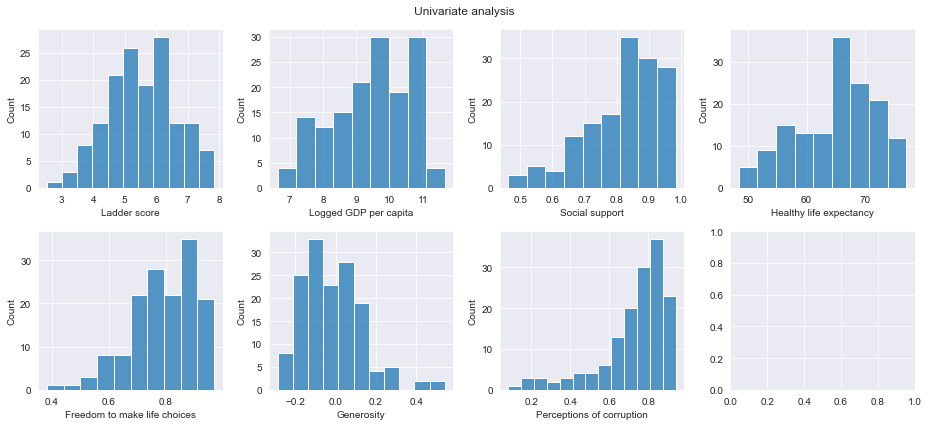

In [31]:
sns.set_style("darkgrid")

fig, ax =plt.subplots(2,4, figsize=(13,6))

sns.histplot(data_2020['Ladder score'], ax=ax[0,0])
sns.histplot(data_2020['Logged GDP per capita'], ax=ax[0,1] )
sns.histplot(data_2020['Social support'], ax=ax[0,2])
sns.histplot(data_2020['Healthy life expectancy'], ax=ax[0,3])
sns.histplot(data_2020['Freedom to make life choices'], ax=ax[1,0])
sns.histplot(data_2020['Generosity'], ax=ax[1,1])
sns.histplot(data_2020['Perceptions of corruption'], ax=ax[1,2])

plt.suptitle('Univariate analysis')
fig.tight_layout()
plt.show();

Multivariate analysis:  
The ladder score has a high correlation with the GDP, Social support and Healthy life expectancy. There is a significant correlation as well with the Freedom to make life choices.  
The GDP, the Healthy life expectancy and Social support are highly correlated one to the others.

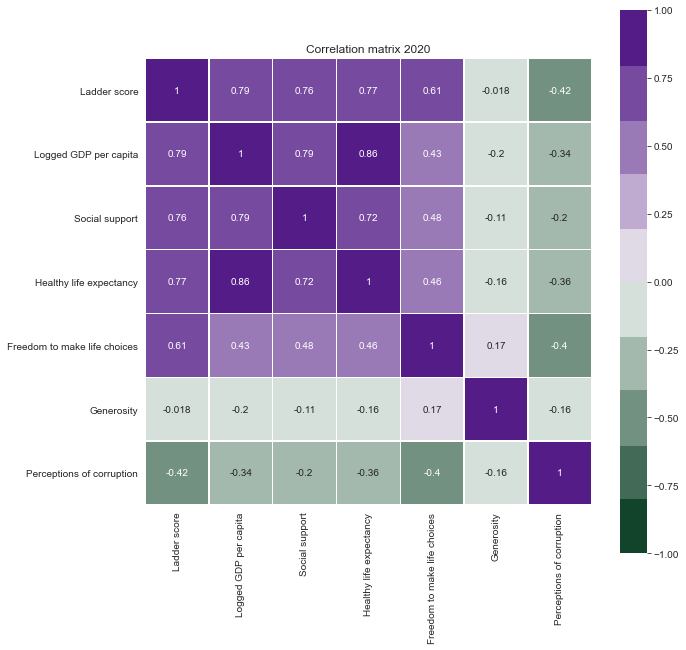

In [32]:
plt.figure(figsize=(10,10))

ax = sns.heatmap(data_2020[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

ax.set_title('Correlation matrix 2020');

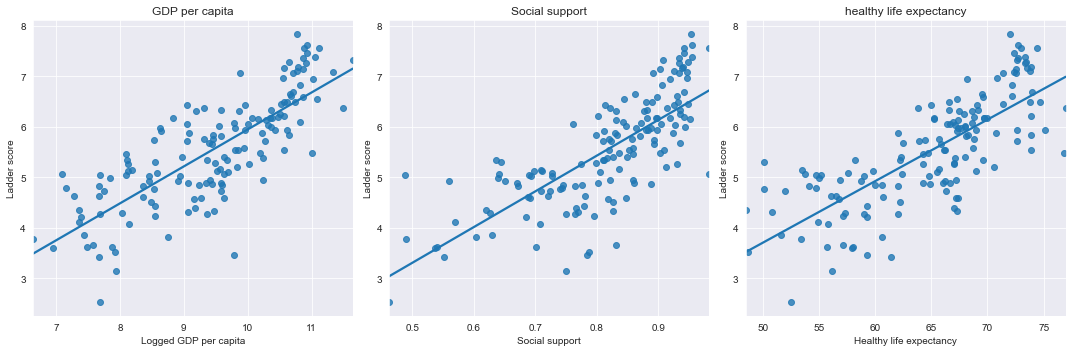

In [33]:
sns.set_style("darkgrid")
fig, ax =plt.subplots(1,3, figsize=(15,5))

ax1= sns.regplot(data=data_2020, y= 'Ladder score', x='Logged GDP per capita', ci=None, ax=ax[0])
ax2= sns.regplot(data=data_2020, y= 'Ladder score', x='Social support', ci=None, ax=ax[1])
ax3= sns.regplot(data=data_2020, y= 'Ladder score', x='Healthy life expectancy',ci=None, ax=ax[2]);

ax1.set_title('GDP per capita')
ax2.set_title('Social support')
ax3.set_title('healthy life expectancy')

fig.tight_layout()
plt.show()

## Outliers:
The Ladder score, the Social support, the freedom to make life choices, the Generosity and the perception of corruption have some outliers.  
That means that some countries are excelling or having a really low ranking for those categories.

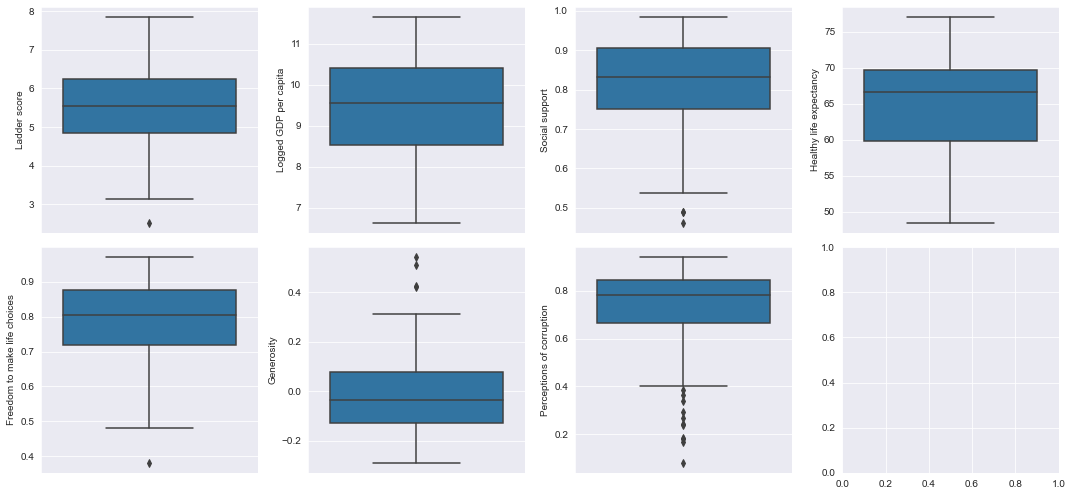

In [34]:
fig, ax = plt.subplots(2,4, figsize=(15,7))

ax1=sns.boxplot(data=data_2020, y='Ladder score', ax=ax[0,0])
ax2=sns.boxplot(data=data_2020, y='Logged GDP per capita', ax=ax[0,1])
ax3=sns.boxplot(data=data_2020, y='Social support', ax=ax[0,2])
ax4=sns.boxplot(data=data_2020, y='Healthy life expectancy', ax=ax[0,3])
ax5=sns.boxplot(data=data_2020, y='Freedom to make life choices', ax=ax[1,0])
ax6=sns.boxplot(data=data_2020, y='Generosity', ax=ax[1,1])
ax7=sns.boxplot(data=data_2020, y='Perceptions of corruption', ax=ax[1,2])
 
    
fig.tight_layout()
plt.show()

In [35]:
outliers_ladder = list(data_2020['Country name'][data_2020['Ladder score'] < 3])
outliers_social = list(data_2020['Country name'][data_2020['Social support'] < 0.5])
outliers_freedom = list(data_2020['Country name'][data_2020['Freedom to make life choices'] < 0.4])
outliers_generosity = list(data_2020['Country name'][data_2020['Generosity'] > 0.4])
outliers_corruption = list(data_2020['Country name'][data_2020['Perceptions of corruption'] < 0.4])

print("Here a the countries which are ouliers:\n")
print("Extremly low ladder score:", ', '.join(outliers_ladder))
print("Very poor Social support:", ', '.join(outliers_social))
print("Few freedom to make life choices is", ', '.join(outliers_freedom))
print("Over the top generosity:", ', '.join(outliers_generosity))
print("Very little perception of corruption:", ', '.join(outliers_corruption))

Here a the countries which are ouliers:

Extremly low ladder score: Afghanistan
Very poor Social support: Benin, Burundi, Afghanistan
Few freedom to make life choices is Afghanistan
Over the top generosity: Indonesia, Gambia, Myanmar, Haiti
Very little perception of corruption: Finland, Denmark, Switzerland, Netherlands, Norway, Sweden, Luxembourg, New Zealand, Ireland, Singapore, Rwanda


## Let's get into specifics:

Happiest and least happy countries:  
We can see that the No1 is Finland and that 9 out of the first 10 countries are located in Western Europe.  
On the other hand, 7 of the 10 countries with the lowest ladder score are located in the Sub-Sahara Africa region.

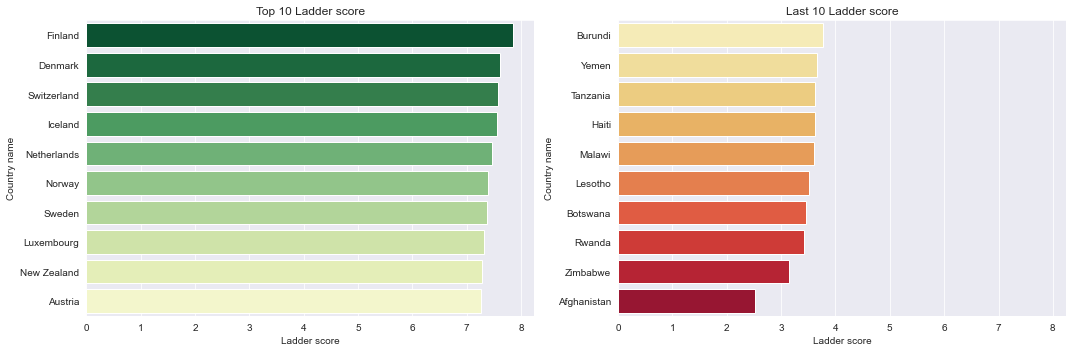

In [36]:
plot_variables('Ladder score')

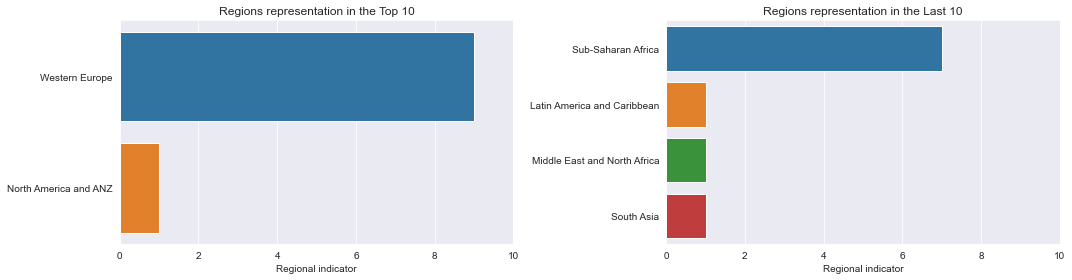

In [37]:
top10_happiness = data_2020.sort_values(by='Ladder score', ascending=False).head(10)
last10_happiness = data_2020.sort_values(by='Ladder score', ascending=False).tail(10)

top10_region = pd.DataFrame(top10_happiness['Regional indicator'].value_counts())
last10_region = pd.DataFrame(last10_happiness['Regional indicator'].value_counts())

fig, ax = plt.subplots(1,2,figsize=(15,4), sharex=True)

ax1 = sns.barplot(data=top10_region, y=top10_region.index, x= 'Regional indicator', ax=ax[0])
ax2 = sns.barplot(data=last10_region, y=last10_region.index, x='Regional indicator', ax=ax[1])

ax1.set_title('Regions representation in the Top 10')
ax2.set_title('Regions representation in the Last 10')

ax1.set(xlim=(0,10))

fig.tight_layout()
plt.show();

Highest and lowest countries by variable: 

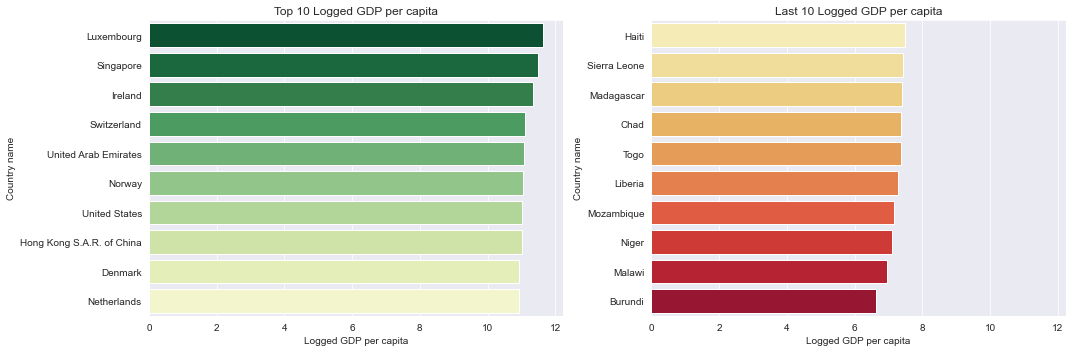

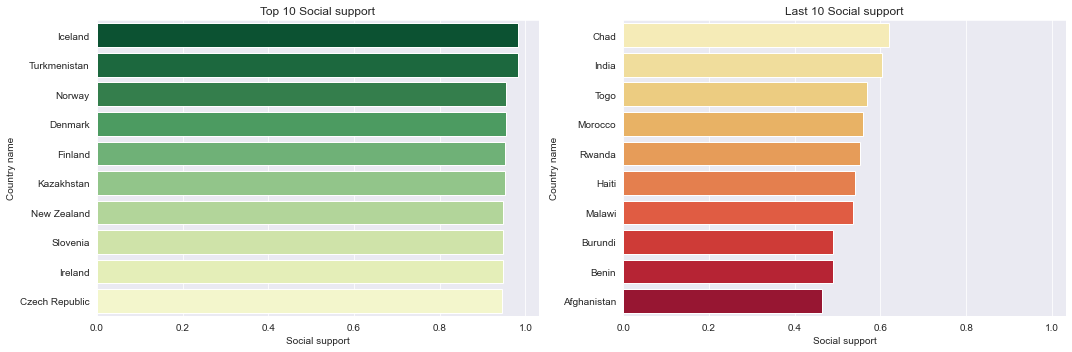

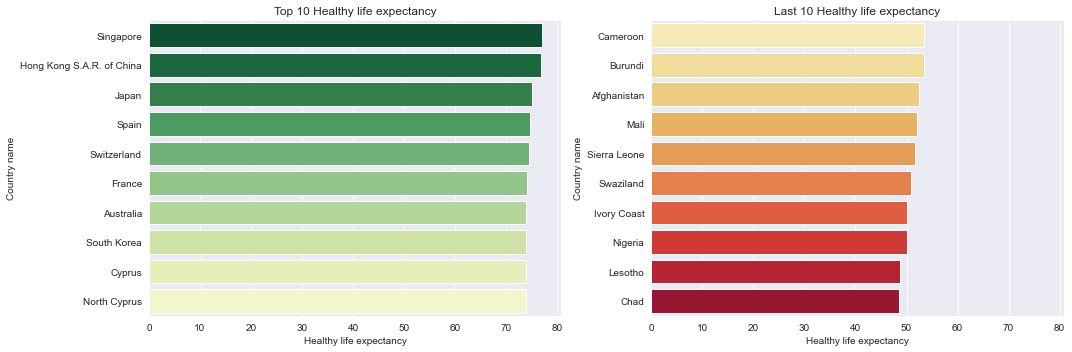

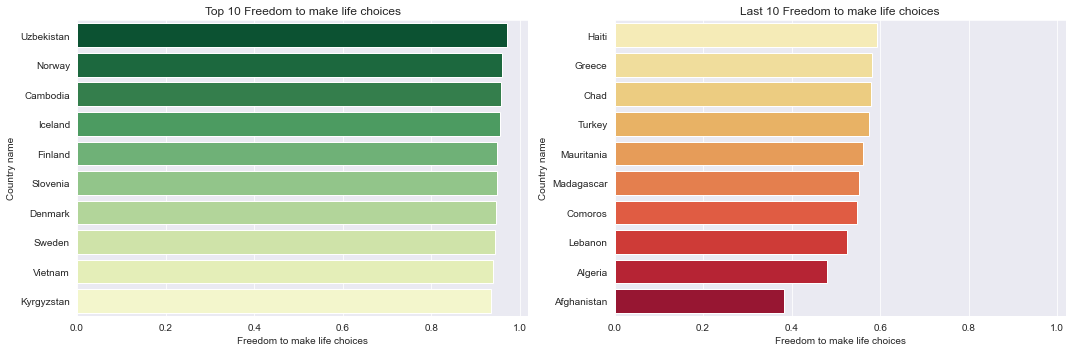

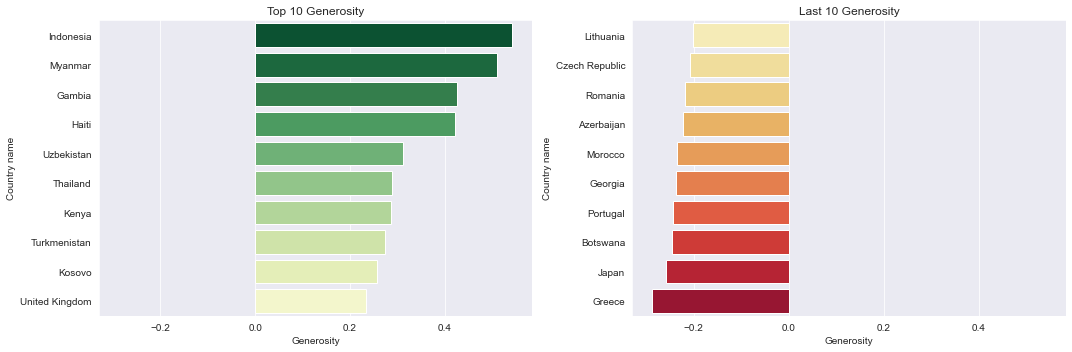

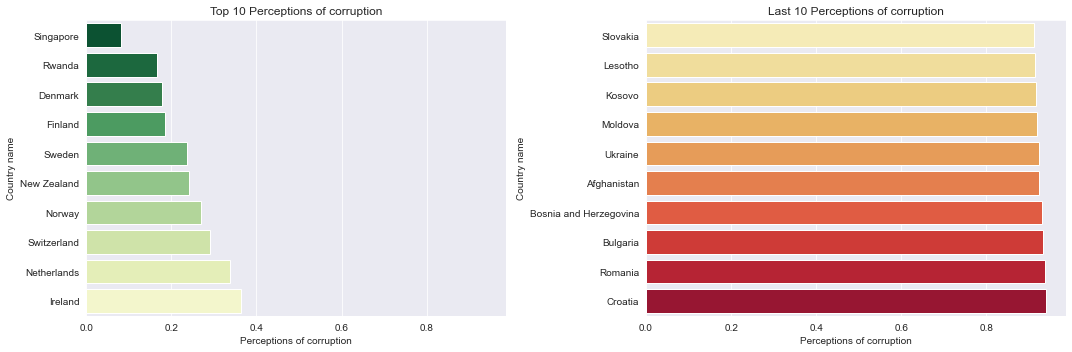

In [38]:
plot_variables('Logged GDP per capita')
plot_variables('Social support')
plot_variables('Healthy life expectancy')
plot_variables('Freedom to make life choices')
plot_variables('Generosity')
plot_variables('Perceptions of corruption')

Finland is leading the ladder score but it's not leading any of the different categories. Here is how it ranks:

In [39]:
country_rankings('Finland', 2020)

Finland rankings for 2020:

Ladder score :  1
Logged GDP per capita :  20
Social support :  5
Healthy life expectancy :  29
Freedom to make life choices :  5
Generosity :  101
Perceptions of corruption :  4


Acrosss the regions, the mean ladder score is quiet higher for North American and ANZ and Western Europe in comparison to the rest of world. North America and ANZ's mean and median are above the ones of Western europe but we have to take it into account that there is only 4 countries in that region and 21 in Western Europe. There is a way bigger standard deviation in Europe. That explains that 9 of the 10 happiest countries are located in Western europe.

In [40]:
data_2020.groupby('Regional indicator')['Ladder score'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
North America and ANZ,4.0,7.128725,0.137747,6.9515,7.065350,7.14340,7.206775,7.2766
Western Europe,21.0,6.914862,0.656596,5.5355,6.490700,7.08530,7.392500,7.8421
Central and Eastern Europe,17.0,5.984677,0.493281,5.1012,5.813100,6.07790,6.255400,6.9647
Latin America and Caribbean,20.0,5.908035,0.693500,3.6149,5.751975,5.99225,6.311100,7.0694
East Asia,6.0,5.810567,0.440104,5.3391,5.526825,5.76135,5.916750,6.5844
Commonwealth of Independent States,12.0,5.466958,0.438024,4.8748,5.144700,5.47170,5.749300,6.1788
Southeast Asia,9.0,5.407467,0.606153,4.4258,5.030000,5.38430,5.880200,6.3765
Middle East and North Africa,17.0,5.219712,0.999275,3.6579,4.583800,4.88710,6.106100,7.1571
Sub-Saharan Africa,36.0,4.494544,0.654930,3.1448,4.098450,4.61590,4.999525,6.0490


Across the regions, North America and ANZ and Western europe are in the top 2 of the GDP, Social support, life expectancy and the Perceptions of corruption.  
Southeast Asia is leading the freedom to make like choices and Generosity rankings.

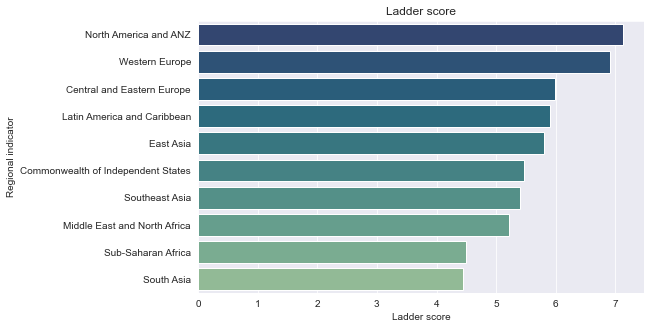

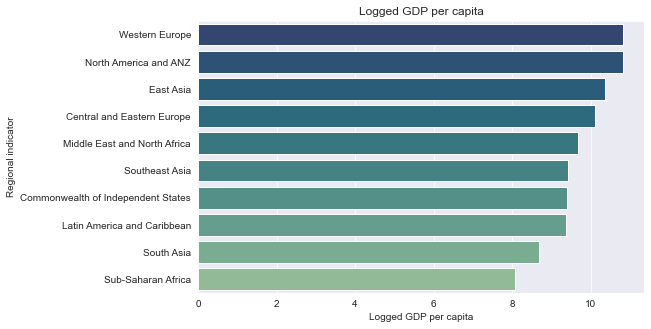

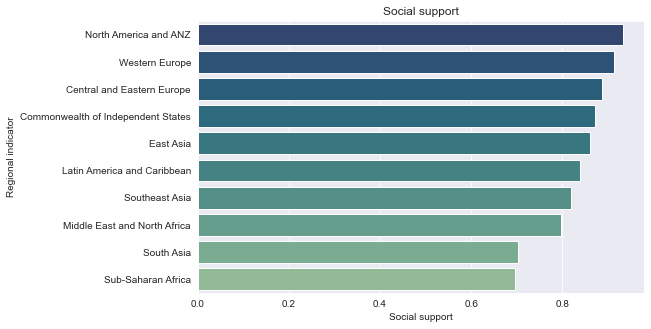

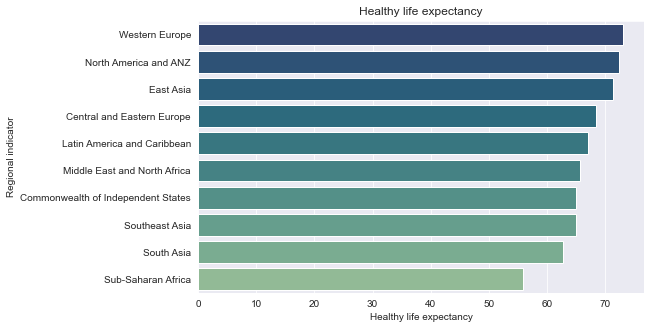

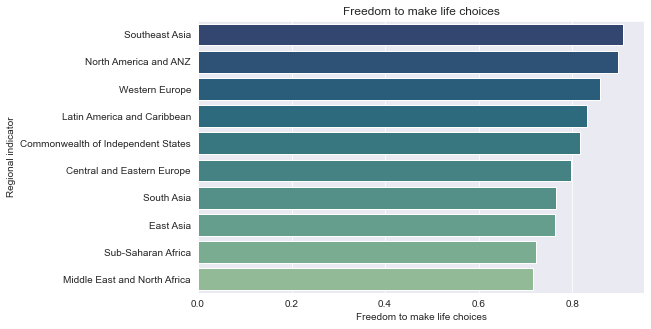

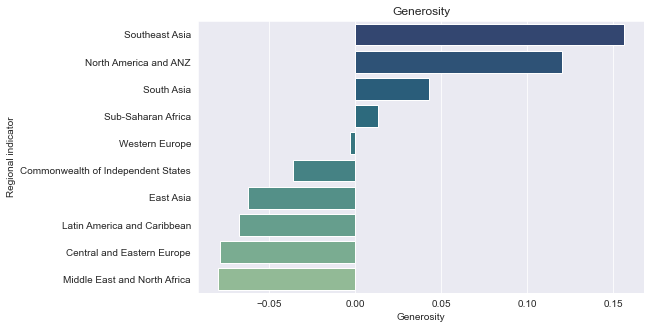

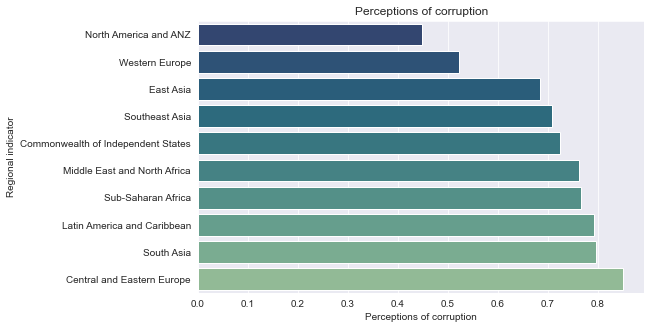

In [41]:
plot_region('Ladder score')
plot_region('Logged GDP per capita')
plot_region('Social support')
plot_region('Healthy life expectancy')
plot_region('Freedom to make life choices')
plot_region('Generosity')
plot_region('Perceptions of corruption')

## Is there an impact of the number of COVID-19 deaths on the ladder score?  
In order to check it out, we are going to add the number of death per 100,000 population to the 2020 dataframe.  
The mortality dataset has more countries that the happiness data of 2020.

In [42]:
print("Mortality data: {}".format(len(mortality_data['Country name'])))
print("2020 data: {}".format(len(data_2020['Country name'])))

Mortality data: 163
2020 data: 149


We are going to do a join to keep only the data from the countries that are present in the 2020 dataset.

In [43]:
mortality_df = mortality_data[['Country name', 'COVID-19 deaths per 100,000 population in 2020']]
ladder_score = data_2020[['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

combined_df = ladder_score.join(mortality_df.set_index('Country name'), on='Country name', how='left')

Looking at the number of death by COVID-19 per 100,000 population, we notice that the mean is 32 and the median is 14. Indeed, the standard deviation is 39 which is a huge value!

In [44]:
combined_df['COVID-19 deaths per 100,000 population in 2020'].describe()

count    146.000000
mean      32.990984
std       39.385474
min        0.000000
25%        1.800075
50%       14.145201
75%       52.568151
max      168.495697
Name: COVID-19 deaths per 100,000 population in 2020, dtype: float64

Using the correlation matrix function, we can see that there is no linear regression relationship between the numbers of COVID-19 deaths and the Ladder Score and neither with the other variables.

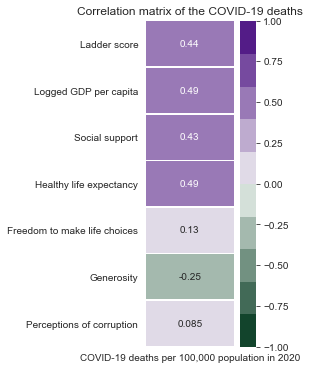

In [45]:
covid_correlation = combined_df.corr().iloc[:-1,:]
mask = covid_correlation.columns.isin(['COVID-19 deaths per 100,000 population in 2020'])

covid_correlation = covid_correlation.loc[:, mask]

plt.figure(figsize=(2,6))
ax = sns.heatmap(covid_correlation, 
                cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), 
                annot=True,
                vmin=-1,
                vmax=1,
                center=0,
                linewidths=.5
                )
ax.set_title('Correlation matrix of the COVID-19 deaths');

By region, the results remains the same. Execpt for North America and ANZ which has a negative regression, but as there is only 4 countries, we won't jump to any conclusion.   
Sub saharan africa and Southeast Asia, have a significant amount of countries with a number of deaths per 100,000 population below 1... it raises some suspicion on the validity of the mortality data in hand.

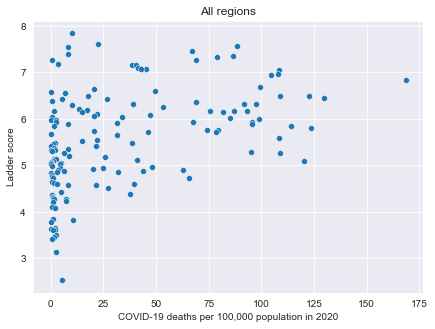

In [46]:
fig, ax = plt.subplots(figsize = (7,5))
sns.scatterplot(ax=ax,data=combined_df, y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020')
ax.set_title("All regions");

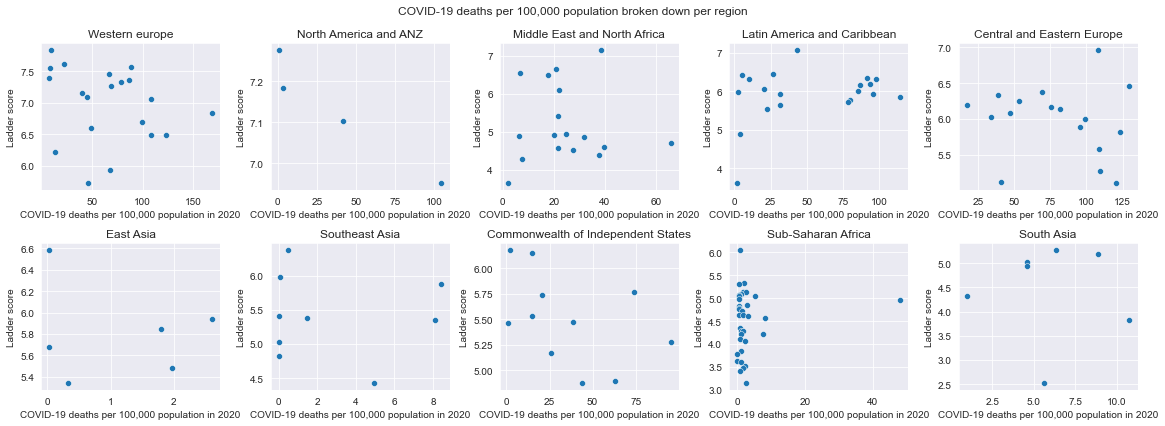

In [47]:
sns.set_style("darkgrid")

fig, ax =plt.subplots(2,5, figsize=(16,6))

ax1= sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'Western Europe'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[0,0])
ax2 =sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'North America and ANZ'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[0,1])
ax3 = sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'Middle East and North Africa'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[0,2])
ax4 = sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'Latin America and Caribbean'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[0,3])
ax5 = sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'Central and Eastern Europe'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[0,4])
ax6=sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'East Asia'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[1,0])
ax7=sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'Southeast Asia'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[1,1])
ax8=sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'Commonwealth of Independent States'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[1,2])
ax9=sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'Sub-Saharan Africa'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[1,3])
ax10= sns.scatterplot(data=combined_df[combined_df['Regional indicator'] == 'South Asia'], y= 'Ladder score', x='COVID-19 deaths per 100,000 population in 2020', ax=ax[1,4])

plt.suptitle('COVID-19 deaths per 100,000 population broken down per region')

ax1.set_title('Western europe')
ax2.set_title('North America and ANZ')
ax3.set_title('Middle East and North Africa')
ax4.set_title('Latin America and Caribbean')
ax5.set_title('Central and Eastern Europe')
ax6.set_title('East Asia')
ax7.set_title('Southeast Asia')
ax8.set_title('Commonwealth of Independent States')
ax9.set_title('Sub-Saharan Africa')
ax10.set_title('South Asia')

fig.tight_layout()
plt.show();

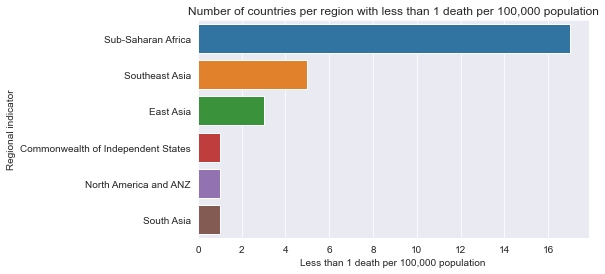

In [69]:
mask = combined_df['COVID-19 deaths per 100,000 population in 2020'] < 1
below_1 = combined_df[mask][['Regional indicator','COVID-19 deaths per 100,000 population in 2020']].groupby('Regional indicator').count().sort_values(by='COVID-19 deaths per 100,000 population in 2020',ascending=False)
below_1 = below_1.rename(columns={'COVID-19 deaths per 100,000 population in 2020':'Less than 1 death per 100,000 population'})

plt.figure(figsize=(7,4))
ax= sns.barplot(data=below_1, y=below_1.index, x= 'Less than 1 death per 100,000 population')

ax.set_title('Number of countries per region with less than 1 death per 100,000 population')

plt.show();

## COMPARISON WITH 2019

Here is an overlay of the distribution of the variable of 2020 and 2019:

In [49]:
data_2019 = historical_data[historical_data['year'] == 2019]

<ipython-input-50-8aaaac82771f>:29: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax1,ax2], labels=line_labels, loc="upper right")


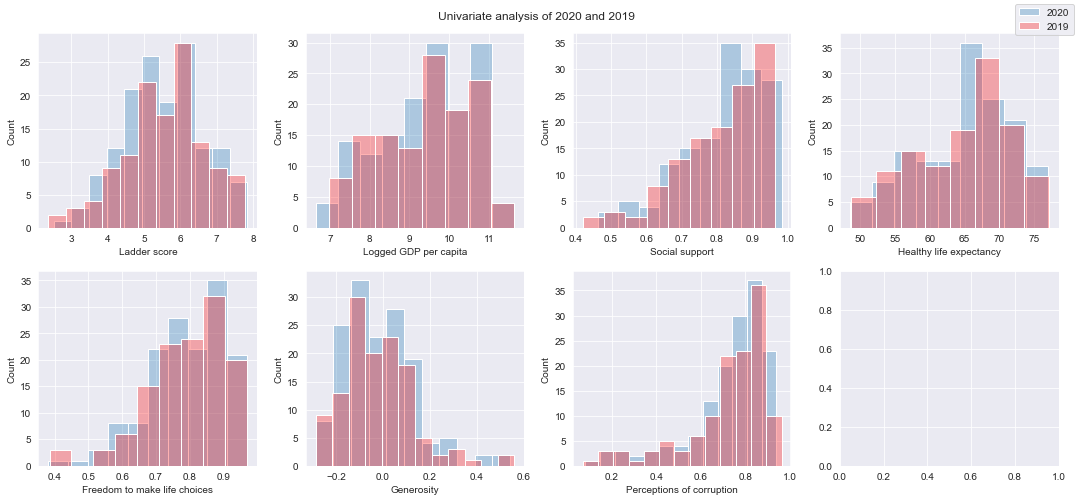

In [50]:
sns.set_style("darkgrid")

fig, ax =plt.subplots(2,4, figsize=(15,7))

ax1= sns.histplot(data_2020['Ladder score'], alpha = 0.3, ax=ax[0,0])
ax2= sns.histplot(data_2019['Ladder score'], alpha = 0.3,color='red', ax=ax[0,0])

sns.histplot(data_2020['Logged GDP per capita'], alpha = 0.3, ax=ax[0,1])
sns.histplot(data_2019['Logged GDP per capita'], alpha = 0.3,color = 'red', ax=ax[0,1])

sns.histplot(data_2020['Social support'],alpha = 0.3, ax=ax[0,2])
sns.histplot(data_2019['Social support'], alpha = 0.3, color = 'red',ax=ax[0,2])

sns.histplot(data_2020['Healthy life expectancy'], alpha = 0.3,ax=ax[0,3])
sns.histplot(data_2019['Healthy life expectancy'], alpha = 0.3, color = 'red',ax=ax[0,3])

sns.histplot(data_2020['Freedom to make life choices'],alpha = 0.3, ax=ax[1,0])
sns.histplot(data_2019['Freedom to make life choices'], alpha = 0.3, color = 'red', ax=ax[1,0])

sns.histplot(data_2020['Generosity'], alpha = 0.3,ax=ax[1,1])
sns.histplot(data_2019['Generosity'], alpha = 0.3, color = 'red',ax=ax[1,1])

sns.histplot(data_2020['Perceptions of corruption'], alpha = 0.3, legend=True,ax=ax[1,2])
sns.histplot(data_2019['Perceptions of corruption'], alpha = 0.3, color = 'red',ax=ax[1,2])

line_labels=['2020', '2019']

plt.suptitle('Univariate analysis of 2020 and 2019')
fig.legend([ax1,ax2], labels=line_labels, loc="upper right")
fig.tight_layout()
plt.show();

Comparing the correlation matrix of 2020 and 2019, we notice that the figures are really close from one year to the other. The importance of the Freedom to make life choices and the GDP on the Ladder score slightly increase in 2020.

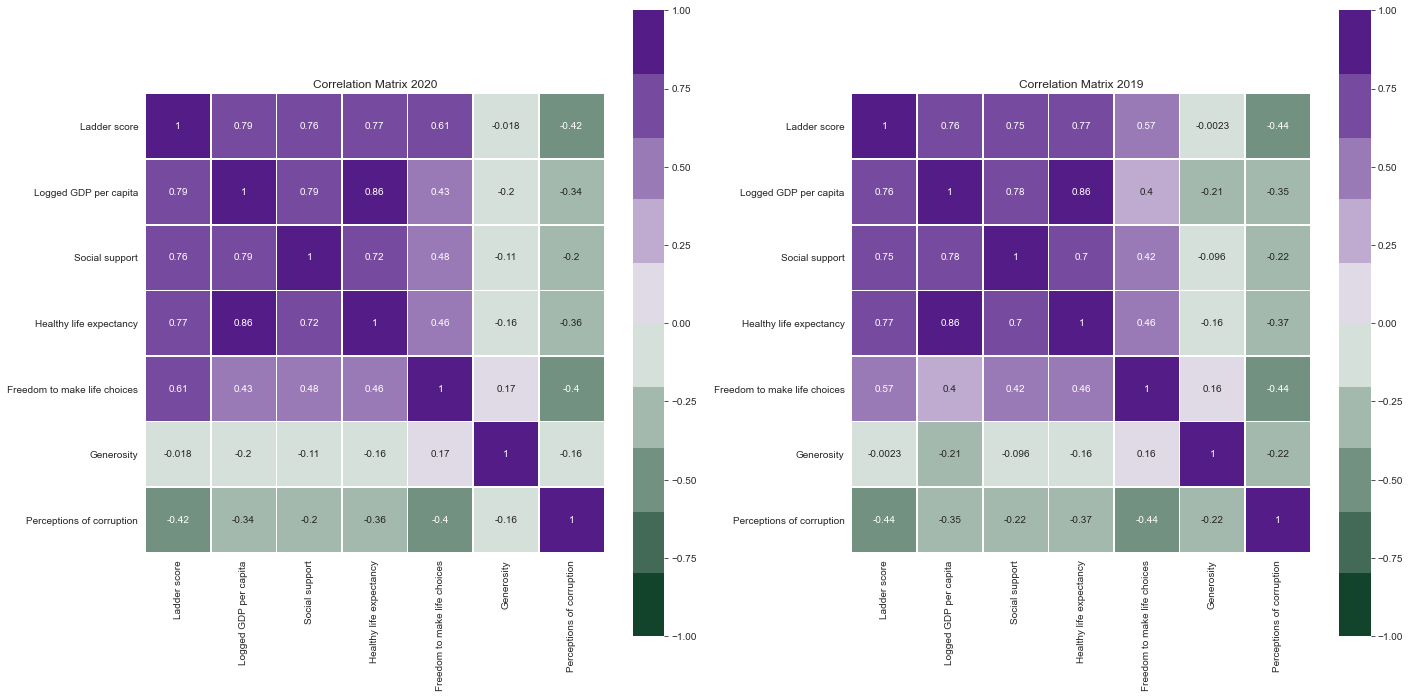

In [51]:
fig, ax =plt.subplots(1,2, figsize=(20,10))

ax1 = sns.heatmap(data_2020[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5, 
            ax=ax[0]);

ax2 = sns.heatmap(data_2019[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5, 
            ax=ax[1])

ax1.set_title('Correlation Matrix 2020')
ax2.set_title('Correlation Matrix 2019')

fig.tight_layout()
plt.show();

In terms of the mean and the median, there is barely no differences from one year to the other. The ladder score and healthy life expectancy are a little bit lower in 2020.

In [52]:
mean_2019 = data_2019[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].describe().iloc[1,:]
mean_2020 = data_2020[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].describe().iloc[1,:]

In [53]:
mean_comparison = pd.concat([mean_2019, mean_2020], axis=1, keys=['Mean 2019','Mean 2020'])
mean_comparison['Difference'] = mean_comparison['Mean 2020'] - mean_comparison['Mean 2019']
mean_comparison

,Mean 2019,Mean 2020,Difference
Ladder score,5.559387,5.532832,-0.026555
Logged GDP per capita,9.421646,9.432209,0.010563
Social support,0.811181,0.814726,0.003545
Healthy life expectancy,64.891625,64.992784,0.101159
Freedom to make life choices,0.793967,0.791572,-0.002395
Generosity,-0.021130,-0.015149,0.005981
Perceptions of corruption,0.723720,0.727477,0.003757


In [54]:
median_2019 = data_2019[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].describe().iloc[5,:]
median_2020 = data_2020[['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].describe().iloc[5,:]

median_comparison = pd.concat([median_2019, median_2020], axis=1, keys=['Median 2019','Median 2020'])
median_comparison['Difference'] = median_comparison['Median 2020'] - median_comparison['Median 2019']
median_comparison

,Median 2019,Median 2020,Difference
Ladder score,5.639185,5.533500,-0.105685
Logged GDP per capita,9.559665,9.568728,0.009063
Social support,0.842202,0.831914,-0.010288
Healthy life expectancy,66.500000,66.603096,0.103096
Freedom to make life choices,0.817405,0.804414,-0.012991
Generosity,-0.045554,-0.036025,0.009529
Perceptions of corruption,0.778971,0.780623,0.001652


Can you spot some differences between the happiest countries for 2019 and 2020?

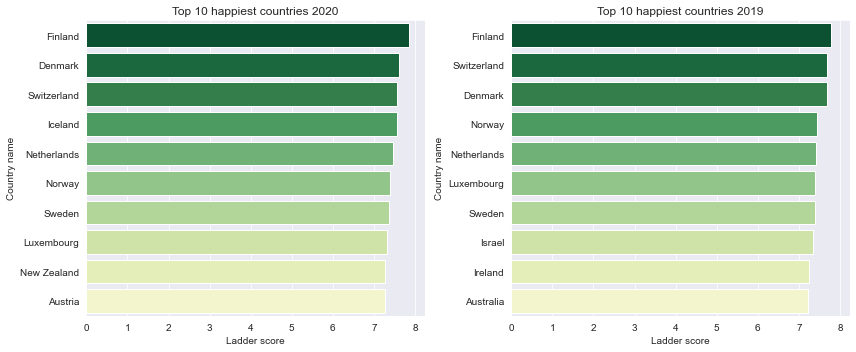

In [55]:
happiness_top10_2019 = data_2019[['Country name','Ladder score']].sort_values(by='Ladder score', ascending=False).reset_index().head(10)

fig, ax =plt.subplots(1,2, figsize=(12,5), sharex=True)

ax1= sns.barplot(data=data_2020.sort_values(by='Ladder score', ascending=False).reset_index().head(10), y='Country name', x= 'Ladder score', palette= 'YlGn_r',  ax=ax[0])
ax2= sns.barplot(data=happiness_top10_2019,y='Country name', x= 'Ladder score', palette= 'YlGn_r', ax=ax[1])

ax1.set_title('Top 10 happiest countries 2020')
ax2.set_title('Top 10 happiest countries 2019')

fig.tight_layout()
plt.show();

In [56]:
top10_year_comparison(2020,2019)

Which countries has maintained their position, dissapeared or made their appearance in the Top 10 of 2020 in comparison to 2019?

Finland ranking in 2020: 1 (ranking in 2019: 1 )
Denmark ranking in 2020: 2 (ranking in 2019: 3 )
Switzerland ranking in 2020: 3 (ranking in 2019: 2 )
Iceland ranking in 2020: 4 (It is a new comer)
Netherlands ranking in 2020: 5 (ranking in 2019: 5 )
Norway ranking in 2020: 6 (ranking in 2019: 4 )
Sweden ranking in 2020: 7 (ranking in 2019: 7 )
Luxembourg ranking in 2020: 8 (ranking in 2019: 6 )
New Zealand ranking in 2020: 9 (It is a new comer)
Austria ranking in 2020: 10 (It is a new comer)
Israel has dissapeared from the Top 10 in 2020. (2019 ranking: 8 )
Ireland has dissapeared from the Top 10 in 2020. (2019 ranking: 9 )
Australia has dissapeared from the Top 10 in 2020. (2019 ranking: 10 )
